In [20]:
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [115]:
#create the data
n=50 #number of samples
#center data clouds for the two classes
origin1=torch.tensor([2,2])
origin2=torch.tensor([7,7])
noise=5 #st dev of the noise spread
#class 1
x_class1=origin1 + noise *torch.randn(n,2)
y_class1=torch.zeros(n)
#class 2
x_class2=origin2 + noise *torch.randn(n,2)
y_class2=torch.ones(n)

x= torch.cat([x_class1,x_class2],dim=0)
y= torch.cat([y_class1,y_class2],dim=0)
#shuffle
indices = torch.randperm(len(x))
coordinates = x[indices]
labels = y[indices]

In [117]:
labels = labels.view(-1, 1)

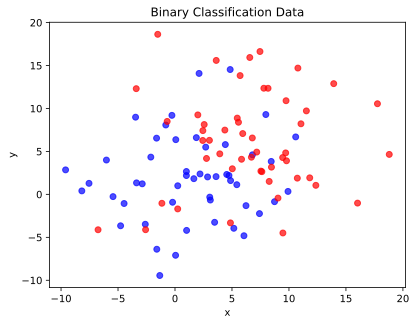

In [119]:
plt.scatter(x[:, 0].numpy(), x[:, 1].numpy(), c=y.numpy(), cmap='bwr', alpha=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Binary Classification Data')
plt.show()

In [121]:
# build the model and add multiple layers 
def modlearn(learningrate):
    #model
    ANNclassify = nn.Sequential(
        nn.Linear(2,15),   # input layer
        nn.ReLU(),        # activation unit
        nn.Linear(15,1),   # output unit
        nn.Sigmoid(),     # final activation unit, better to use BCEWithLogitsLoss
          )
    # loss function
    lossfun = nn.BCEWithLogitsLoss()
    
    # optimizer
    optimizer = torch.optim.SGD(ANNclassify.parameters(),lr=learningrate)
    
    # model output
    return ANNclassify,lossfun,optimizer

In [123]:
numepochs = 2000

In [125]:
# model train function
def modtrain(ANN_model):
    losses = torch.zeros(numepochs)
    
    for epochs in range(numepochs):
    
      # forward pass
      yHat = ANN_model(coordinates)
    
      # compute loss
      loss = lossfun(yHat,labels)
      losses[epochs] = loss
    
      # backprop
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      # final forward pass
      predictions = ANN_model(coordinates)

    totalacc = 100*torch.mean(((predictions>0.5) == labels).float())
    
    return losses,predictions,totalacc

Final accuracy: 73%


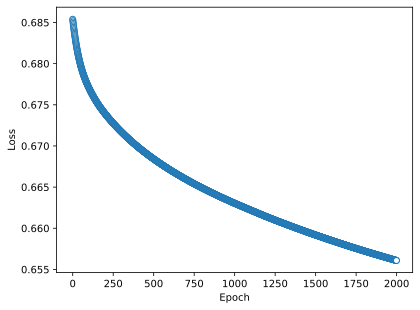

In [128]:
# put everything together
ANN_model,lossfun,optimizer = modlearn(.01)

# run it
losses,predictions,totalacc = modtrain(ANN_model)

# report accuracy
print('Final accuracy: %g%%' %totalacc)

# show the losses
plt.plot(losses.detach(),'o',markerfacecolor='w',linewidth=.1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

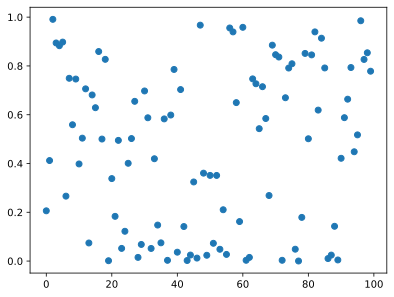

In [130]:
plt.plot(predictions.detach(),'o')

In [132]:
# List of learning rates to test
learningrates = np.linspace(.01,1,20)
allLosses = np.zeros((len(learningrates),numepochs))
# initialize results output
accuracymod = []
allLosses = np.zeros((len(learningrates),numepochs))


# loop through learning rates
for i,lr in enumerate(learningrates):
  
  # create and run the model
  ANN_model,lossfun,optimizer = modlearn(lr)
  losses,predictions,totalacc = modtrain(ANN_model)

  # store the results
  accuracymod.append(totalacc)
  allLosses[i,:] = losses.detach()


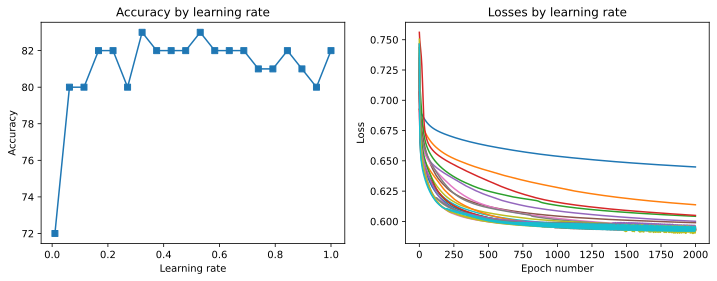

In [133]:
# plot the results
fig,ax = plt.subplots(1,2,figsize=(12,4))

ax[0].plot(learningrates,accuracymod,'s-')
ax[0].set_xlabel('Learning rate')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Accuracy by learning rate')

ax[1].plot(allLosses.T) #transpose to num_epochs, num_learning_rates
ax[1].set_title('Losses by learning rate')
ax[1].set_xlabel('Epoch number')
ax[1].set_ylabel('Loss')
plt.show()